# Time Series Data Analysis of Selected Low-Cost Funds

I have downloaded data of 10 different funds from finance.yahoo.com and manually merged their daily closing prices by date starting 01-01-2014. Each of these funds represent different classes of assets which vary in risk. For investors, higher risk can yield more attractive returns; however, if an investor is risk averse they would look to other asset classes to diversify their portfolio and the risk it carries. 

The ideal goal of this data analysis would be to understand how much weigh to give to each of these funds on a diversified portfolio in order to achieve a specified risk/return rate.

#### Importing libraries I will need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Loading data and understanding what the data looks like

In [3]:
mfunds = pd.read_csv("MFData.csv")
mfunds.head()

,Date,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
0,02-01-14,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13
1,03-01-14,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13
2,06-01-14,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13
3,07-01-14,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13
4,08-01-14,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13


#### Need to clean the data to make it more workable

In [4]:
# creating a new dataframe with 'date' column as index
data = mfunds.set_index('Date')

data.head()

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
Date,,,,,,,,,,
02-01-14,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13
03-01-14,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13
06-01-14,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13
07-01-14,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13
08-01-14,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13


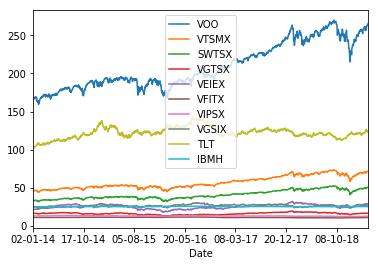

In [5]:
data.plot()

#### Need to make my visualization more interpretable

Populating the interactive namespace from numpy and matplotlib


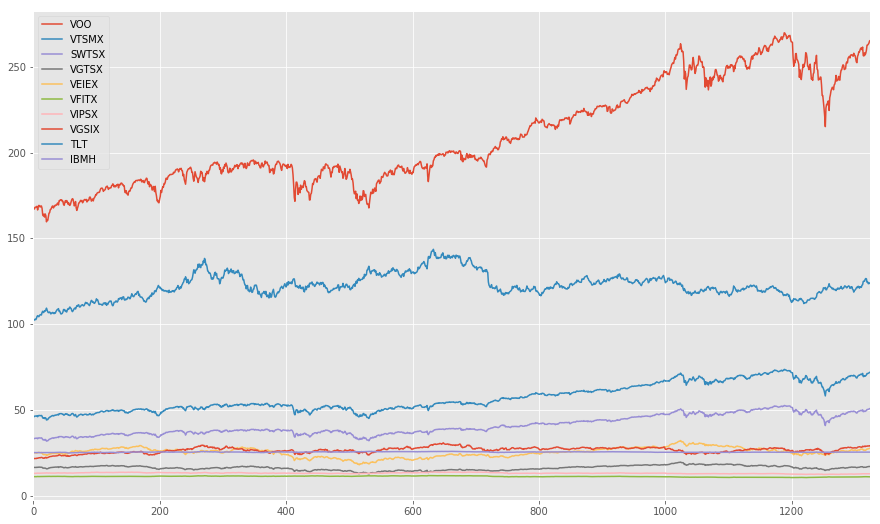

In [66]:
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

data.plot()

We can actually learn form the above plot that TLT is slightly counter-cyclical to the general market trends represented by the rest (We will see below that general trend is reflected by VOO when compared to the Dow Jones Index since VOO contains most of the securities that make up the index. In fact, the bottom couple of lines are also a bit difficult to explore so I will omit the higher priced funds to be able to look at them more closely.

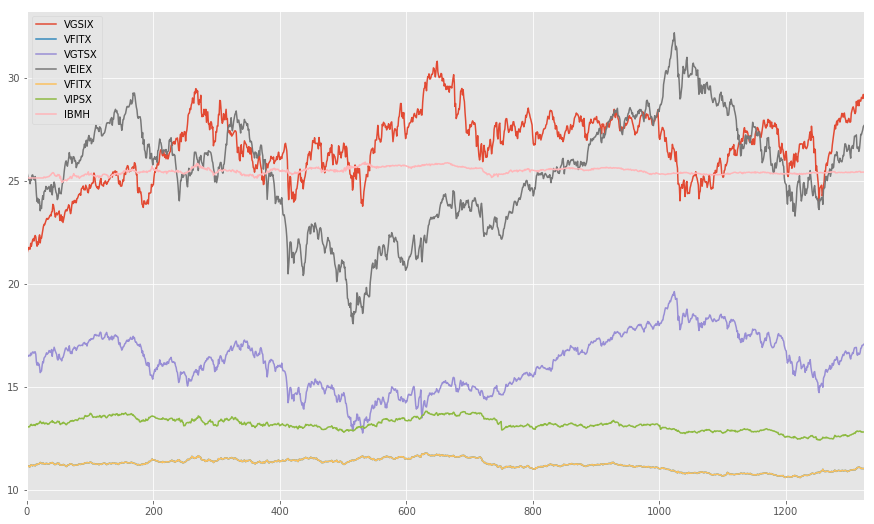

In [82]:
columns = ['VGSIX', 'VFITX', 'VGTSX', 'VEIEX', 'VFITX', 'VIPSX', 'IBMH']
df1 = pd.DataFrame(data, columns=columns)
df1.plot()

It seems that VGSIX does not always convey market trends. We can ignore the flatter lines for IBMH, VPSIX, and VFITX as they contains treasury bonds and assets that are designed to be stable and combat losses to inflation. I will study the correlation of each compared to the market index below. First I will have to retrieve the data for the Dow Jones Market Index and merge it to my current dataset.

#### Merging the new data for Dow Jones Index to mycurrent dataset

In [69]:
mindex = pd.read_csv("DJI.csv") #get the data
mindex = pd.DataFrame(mindex, columns=['Date','Close']) # selecting the columns I want
mindex.columns= ['Date','DJI'] #Rename the column from Close to DJI
mindex.head()

,Date,DJI
0,2014-01-02,16441.349609
1,2014-01-03,16469.990234
2,2014-01-06,16425.099609
3,2014-01-07,16530.939453
4,2014-01-08,16462.740234


In [132]:
#Merging mindex with data using pd.concat()
data = data.reset_index(drop=True) #requied to join without encountering a bug that wipes the data
newdata = pd.concat([data,mindex], axis=1)
#newdata = data.join(mindex)
newdata.set_index("Date", inplace=True, drop=True) #setting Date back as the index again
newdata.head()

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH,DJI
Date,,,,,,,,,,,
2014-01-02,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13,16441.349609
2014-01-03,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13,16469.990234
2014-01-06,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13,16425.099609
2014-01-07,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13,16530.939453
2014-01-08,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13,16462.740234


#### Correlation study with Dow Jones Market Index

In [115]:
newdata.corr()

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH,DJI
VOO,1.000000,0.999213,0.997038,0.541891,0.492222,-0.795351,-0.668240,0.340739,0.017556,-0.116936,0.993923
VTSMX,0.999213,1.000000,0.998498,0.562498,0.510910,-0.804282,-0.665733,0.329520,-0.001839,-0.141380,0.993307
SWTSX,0.997038,0.998498,1.000000,0.577195,0.523723,-0.806036,-0.653612,0.323494,-0.013198,-0.152652,0.990003
VGTSX,0.541891,0.562498,0.577195,1.000000,0.952854,-0.609296,-0.218737,-0.147063,-0.389957,-0.520129,0.565131
VEIEX,0.492222,0.510910,0.523723,0.952854,1.000000,-0.510408,-0.104674,-0.060493,-0.273689,-0.433517,0.513700
VFITX,-0.795351,-0.804282,-0.806036,-0.609296,-0.510408,1.000000,0.783849,0.202647,0.543163,0.565585,-0.829355
VIPSX,-0.668240,-0.665733,-0.653612,-0.218737,-0.104674,0.783849,1.000000,0.145044,0.338807,0.316641,-0.699030
VGSIX,0.340739,0.329520,0.323494,-0.147063,-0.060493,0.202647,0.145044,1.000000,0.774695,0.629991,0.276508
TLT,0.017556,-0.001839,-0.013198,-0.389957,-0.273689,0.543163,0.338807,0.774695,1.000000,0.828300,-0.041631
IBMH,-0.116936,-0.141380,-0.152652,-0.520129,-0.433517,0.565585,0.316641,0.629991,0.828300,1.000000,-0.175255


From the above correlation table, we recognize reduced correlation for VGTSX, VEIEX, and VGSIX. We have negative correlation for VFITX, VIPSX, TLT, and IBMH. This confirms our visual analysis from our first plots.
Will re-raw the correlation table with a color map as reference in case we need to look for insights in the future. Source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

In [128]:
corr = newdata.corr()
corr.style.background_gradient(cmap='RdBu_r', axis=None).set_precision(3) # 'coolwarm', RdBu_r', & 'BrBG' good color maps

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH,DJI
VOO,1,0.999,0.997,0.542,0.492,-0.795,-0.668,0.341,0.0176,-0.117,0.994
VTSMX,0.999,1,0.998,0.562,0.511,-0.804,-0.666,0.33,-0.00184,-0.141,0.993
SWTSX,0.997,0.998,1,0.577,0.524,-0.806,-0.654,0.323,-0.0132,-0.153,0.99
VGTSX,0.542,0.562,0.577,1,0.953,-0.609,-0.219,-0.147,-0.39,-0.52,0.565
VEIEX,0.492,0.511,0.524,0.953,1,-0.51,-0.105,-0.0605,-0.274,-0.434,0.514
VFITX,-0.795,-0.804,-0.806,-0.609,-0.51,1,0.784,0.203,0.543,0.566,-0.829
VIPSX,-0.668,-0.666,-0.654,-0.219,-0.105,0.784,1,0.145,0.339,0.317,-0.699
VGSIX,0.341,0.33,0.323,-0.147,-0.0605,0.203,0.145,1,0.775,0.63,0.277
TLT,0.0176,-0.00184,-0.0132,-0.39,-0.274,0.543,0.339,0.775,1,0.828,-0.0416
IBMH,-0.117,-0.141,-0.153,-0.52,-0.434,0.566,0.317,0.63,0.828,1,-0.175


### Assessment of returns

I need to build new tables from the original dataset (excluding the Dow Jones Index) to assess the returns for each investable fund. The return can be calculated by return(t,0) = price(t)/price(0). source: https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

In [154]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
mfunds_return = data.apply(lambda x: x / x[0])
mfunds_return.head() - 1

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.000895,0.000432,0.000300,-0.000606,-0.006685,-0.000898,0.000000,0.007466,0.000000,0.0
2,-0.003400,-0.002810,-0.002697,-0.001817,-0.014943,0.000898,0.002302,0.012133,0.004209,0.0
3,0.002804,0.003891,0.003896,0.001211,-0.013763,0.001795,0.003070,0.015399,0.006753,0.0
4,0.003221,0.004323,0.004195,0.000606,-0.016123,-0.001795,0.002302,0.011666,0.004013,0.0


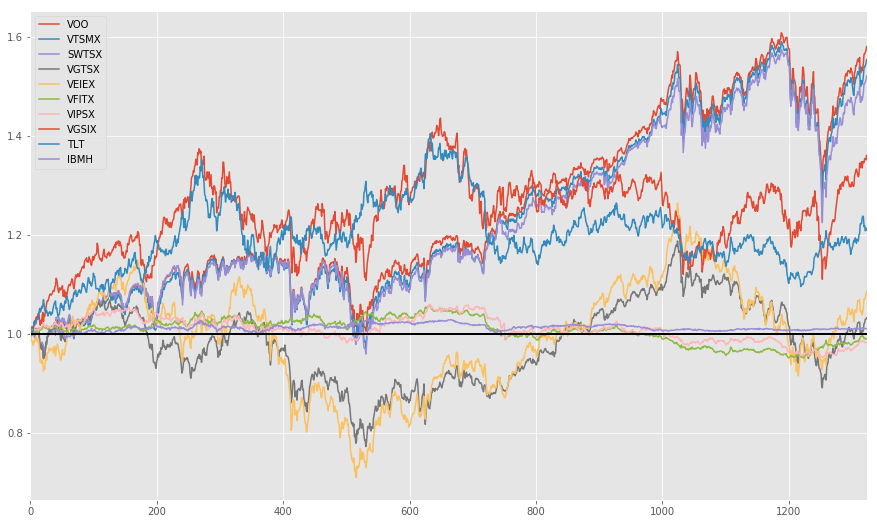

In [151]:
mfunds_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [158]:
cov = mfunds_return.cov()
cov.style.background_gradient(cmap='RdBu_r', axis=None).set_precision(2) # 'coolwarm', RdBu_r', & 'BrBG' good color maps

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
VOO,0.031,0.031,0.029,0.0076,0.0091,-0.0036,-0.0029,0.0046,0.00022,-0.00014
VTSMX,0.031,0.03,0.028,0.0077,0.0092,-0.0035,-0.0028,0.0044,-2.3e-05,-0.00016
SWTSX,0.029,0.028,0.027,0.0075,0.009,-0.0033,-0.0026,0.0041,-0.00016,-0.00017
VGTSX,0.0076,0.0077,0.0075,0.0063,0.0079,-0.0012,-0.00042,-0.00089,-0.0022,-0.00028
VEIEX,0.0091,0.0092,0.009,0.0079,0.011,-0.0013,-0.00026,-0.00048,-0.002,-0.0003
VFITX,-0.0036,-0.0035,-0.0033,-0.0012,-0.0013,0.00064,0.00048,0.00039,0.00098,9.5e-05
VIPSX,-0.0029,-0.0028,-0.0026,-0.00042,-0.00026,0.00048,0.00058,0.00027,0.00059,5.1e-05
VGSIX,0.0046,0.0044,0.0041,-0.00089,-0.00048,0.00039,0.00027,0.0058,0.0042,0.00032
TLT,0.00022,-2.3e-05,-0.00016,-0.0022,-0.002,0.00098,0.00059,0.0042,0.0051,0.0004
IBMH,-0.00014,-0.00016,-0.00017,-0.00028,-0.0003,9.5e-05,5.1e-05,0.00032,0.0004,4.5e-05
